In [91]:
import pandas as pd
path="movie_metadata.csv"
from preprocessing import data_clean
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
data1=data_clean(path)
labels=data1.imdb_score.values
genres_split=data1.genres.str.get_dummies().add_prefix('Part_')
all_data=pd.concat([data1.drop(columns=["genres"]),genres_split],axis=1)
all_data=all_data.drop(columns=["imdb_score"])



preprocessor_tree = ColumnTransformer(
    transformers=[
        
        ('cat', categorical_transformer, categorical_features)],remainder="passthrough")
data_pipeline=Pipeline(steps=[('preprocessor_tree', preprocessor_tree)])
data_pipeline.fit(all_data)
data_trans=data_pipeline.fit_transform(all_data)
Xtrain, Xtest, ytrain, ytest = train_test_split(data_trans, labels, test_size=0.2,random_state=42)





In [122]:
def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print ('MSE: %2.3f' % mse)
    return mse




def R2(y_true,y_pred):    
     r2 = r2_score(y_true, y_pred)
     print ('R2: %2.3f' % r2)
     return r2

def two_score(y_true,y_pred):    
    MSE(y_true,y_pred) #set score here and not below if using MSE in GridCV
    score = R2(y_true,y_pred)
    return score

def two_scorer():
    return make_scorer(two_score, greater_is_better=True)




In [98]:
numeric_features =  all_data.select_dtypes(include=["float"]).columns
categorical_features=all_data.select_dtypes(exclude=["float","bool"]).columns
bool_features=all_data.select_dtypes(include=["bool"]).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)],remainder="passthrough")




X_train, X_test, y_train, y_test = train_test_split(all_data, labels, test_size=0.2,random_state=42)

ridge=Ridge()
ridge_pipeline=Pipeline(steps=[('preprocessor', preprocessor),
                      ('rdg', ridge)])
parameters = {
    'rdg__alpha': np.logspace(-6, 6, 200)
    
}

# fit_params = {"xgbrg__eval_set": [(X_test, y_test)], 
#               "xgbrg__early_stopping_rounds": 10, 
#               "xgbrg__verbose": False} 

searchCV = GridSearchCV(ridge_pipeline, cv=5, param_grid=parameters,scoring=two_scorer())
searchCV.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                             

In [99]:
searchCV.best_params_

{'rdg__alpha': 3.2550885998350565}

In [92]:
model_ridge=searchCV.best_estimator_
model_ridge.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                      

In [93]:
two_score(y_test,model_ridge.predict(X_test))

MSE: 0.746
R2: 0.345


0.34485563996765034

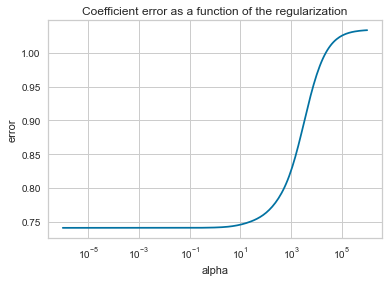

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
coefs = []
errors = []

clf = Ridge()
alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(Xtrain, ytrain)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(ytest, clf.predict(Xtest)))

# Display results


ax = plt.gca()
ax.plot(alphas, errors)
ax.set_xscale('log')

plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')


plt.show()


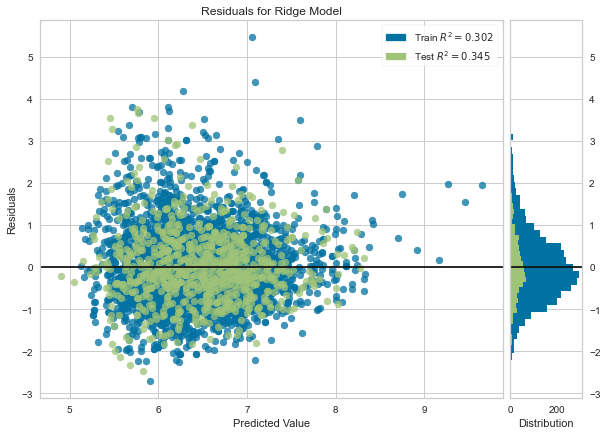

In [114]:
from yellowbrick.regressor import ResidualsPlot

model_ridge.fit(X_train,y_train)
visualizer=ResidualsPlot(model,size=(700, 500))
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer

visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show()


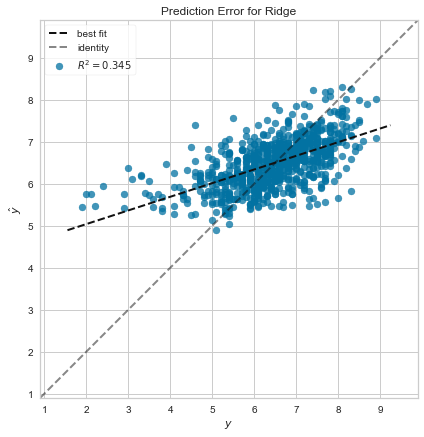

In [115]:
visualizer = PredictionError(model_ridge,size=(700,500))

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

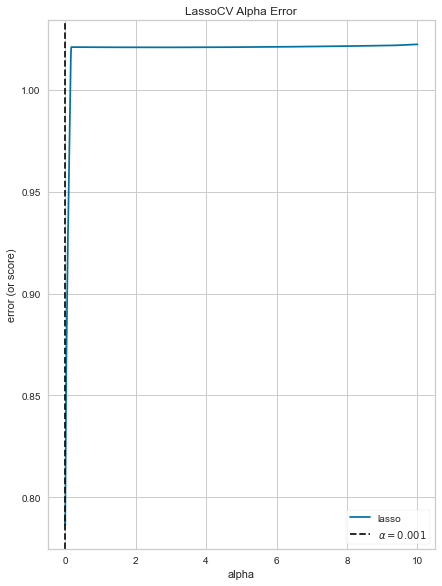

In [123]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from yellowbrick.regressor import AlphaSelection
# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model,size=(500,700))
visualizer.fit(Xtrain, ytrain)
g = visualizer.poof()

In [124]:
from sklearn.linear_model import Lasso
model_lasso=Lasso(alpha=0.001)
model_lasso.fit(Xtrain,ytrain)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [125]:
two_score(y_test,model_lasso.predict(Xtest))

MSE: 0.746
R2: 0.345


0.34479542441961764

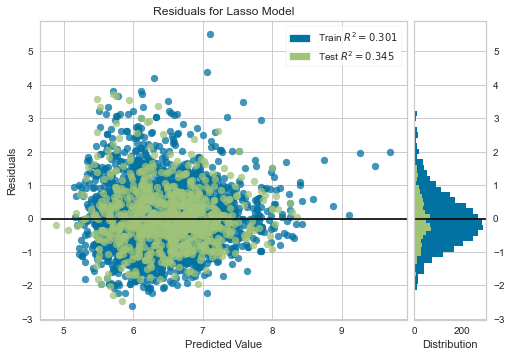

In [46]:
from yellowbrick.regressor import ResidualsPlot
visualizer=ResidualsPlot(model_lasso)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer

visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

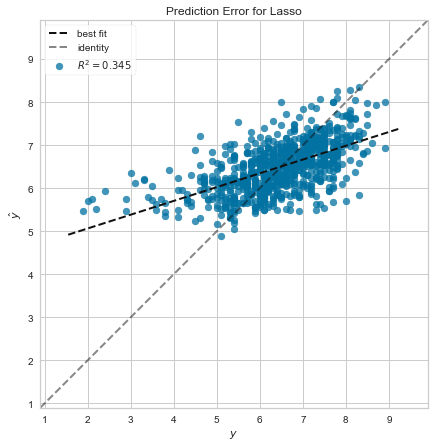

In [130]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model_lasso,size=(500,700))

visualizer.fit(Xtrain, ytrain)  # Fit the training data to the visualizer
visualizer.score(Xtest, ytest)  # Evaluate the model on the test data
visualizer.show()  


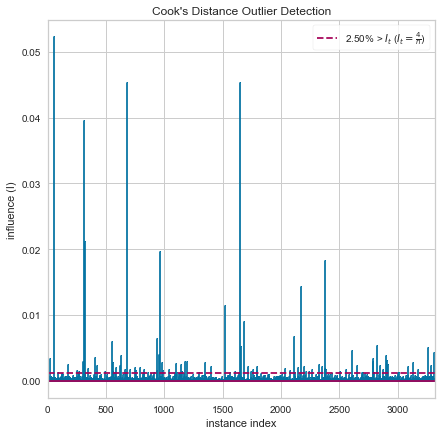

CooksDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x146c4bd10>,
              draw_threshold=True, linefmt='C0-', markerfmt=',')

In [132]:
from yellowbrick.regressor import cooks_distance
cooks_distance(
    Xtrain, ytrain,
    draw_threshold=True,
    linefmt="C0-", markerfmt=",",size=(500, 500)
)